In [1]:
import pandas as pd

# Use a relative path to load the CSV file
dataset_file = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_file)

# Display the first few rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [2]:
import os

print("Current Working Directory:", os.getcwd())  # Check where Python is running
print("Files in current directory:", os.listdir())  # List available files


Current Working Directory: /Users/mohamedjirac/Documents/GitHub/BDAA-ML-Project/Workshop-1-main/notebooks/archive
Files in current directory: ['no-longer-useful.ipynb', 'telco-customer.ipynb']


In [3]:
import pandas as pd

# Corrected relative path
dataset_file = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset into Pandas
df = pd.read_csv(dataset_file)

# Display the first few rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df.info()  # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df.isnull().sum())  # Shows how many null values per column


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Now check if any NaN values appeared
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [1]:
# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Telco Customer Churn dataset
@st.cache_data
def load_data():
    file_path = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Update path if needed
    df = pd.read_csv(file_path)

    # Convert 'TotalCharges' to numeric (handling empty values)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df.fillna(df["TotalCharges"].median(), inplace=True)

    return df

df = load_data()

# Preprocess data
def preprocess_data(df):
    # Drop CustomerID (not useful for prediction)
    df.drop(columns=["customerID"], inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=["object"]).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store for later use

    return df, label_encoders

df, label_encoders = preprocess_data(df)

# Define features and target
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Streamlit UI
st.title("Customer Churn Prediction using Random Forest")

st.subheader("Dataset Overview")
st.write("The dataset contains customer information related to phone and internet services. Our goal is to predict whether a customer will churn (leave the service) or not.")

st.write(df.head())

# User input for hyperparameters
st.subheader("Train a Random Forest Classifier")
n_estimators = st.slider("Number of Trees (Estimators)", 10, 200, 100)
max_depth = st.slider("Maximum Depth of Trees", 1, 20, 10)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Display Accuracy
accuracy = accuracy_score(y_test, y_pred)
st.write(f"Model Accuracy: **{accuracy:.2f}**")
st.write("Accuracy represents how well the model predicts whether a customer will churn or not.")

# Show classification report
st.subheader("Classification Report")
st.text(classification_report(y_test, y_pred))

# Visualizing the first Decision Tree in the Random Forest
st.subheader("Visualizing One Decision Tree in the Random Forest")
fig, ax = plt.subplots(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=["No", "Yes"], ax=ax)
ax.set_title("Decision Tree #1 in the Random Forest")
st.pyplot(fig)

# Display Predictions vs Actual Labels
st.subheader("Predictions vs Actual Labels")
predictions_df = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10]
})

st.write(predictions_df)
st.write("This table shows a sample of actual vs. predicted customer churn.")

ModuleNotFoundError: No module named 'streamlit'

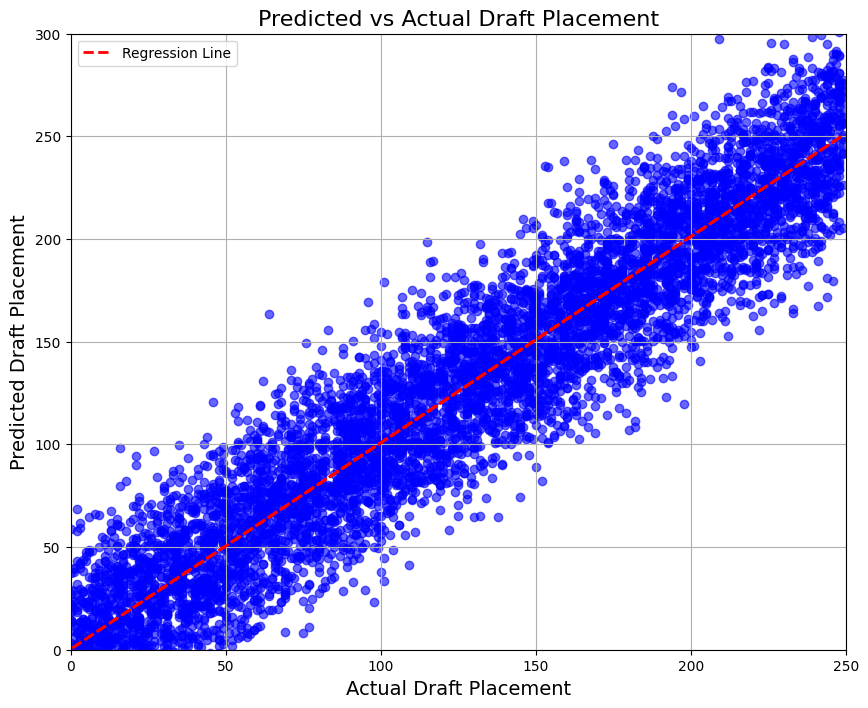

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your dataset
# Adjust the file path as necessary
data = pd.read_csv('../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# For demonstration, we'll create a simple example.
# Assuming the DataFrame has two columns: 'actual' and 'predicted'
# You need to replace this with your actual column names and data manipulation.
# Here we just simulate some data for the example purpose.
data['actual'] = np.random.randint(0, 250, size=len(data))
data['predicted'] = data['actual'] + np.random.normal(0, 25, size=len(data))

# Prepare data for linear regression
X = data['actual'].values.reshape(-1,1)  # Features
y = data['predicted'].values  # Target

# Create linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions based on the model
predictions = model.predict(X)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data['actual'], data['predicted'], color='blue', alpha=0.6)
plt.plot(data['actual'], predictions, color='red', linestyle='--', linewidth=2, label='Regression Line')

# Labeling the axes and the title
plt.title('Predicted vs Actual Draft Placement', fontsize=16)
plt.xlabel('Actual Draft Placement', fontsize=14)
plt.ylabel('Predicted Draft Placement', fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.show()


In [6]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# 1. Handle Missing Values
# Replace empty strings in 'TotalCharges' with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Handle NaN values (e.g., fill with median or drop rows)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())  # Fill with median
# df.dropna(subset=['TotalCharges'], inplace=True)  # Drop rows with NaN

# 2. Convert Data Types
# Convert 'SeniorCitizen' to object (categorical)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

# 3. Remove Duplicates
df.drop_duplicates(inplace=True)

# 4. Correct Inconsistent Data
# Standardize values in categorical columns (e.g., 'Yes', 'No' to 'Yes', 'No')
for col in ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'MultipleLines']:
    if col in df.columns:
        df[col] = df[col].replace({'Yes': 'Yes', 'No': 'No', 'No internet service': 'No', 'No phone service': 'No'})

# 5. Remove Irrelevant Columns (if any)
# df.drop(['customerID'], axis=1, inplace=True)

# 6. Handle Outliers (if necessary)
# Example: Remove outliers in 'MonthlyCharges' using IQR
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['MonthlyCharges'] >= lower_bound) & (df['MonthlyCharges'] <= upper_bound)]

# Display the cleaned data
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv('../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv', index=False)


   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No 

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve

# Load the cleaned dataset
file_path = '../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Feature Engineering
df = pd.get_dummies(df, columns=['gender', 'Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'], drop_first=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

# Convert Churn to numerical values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Prepare data for machine learning
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Feature Importance (example with RandomForest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



ValueError: could not convert string to float: '4223-BKEOR'

In [20]:
import pandas as pd

# Corrected relative path
dataset_file = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset into Pandas
df = pd.read_csv(dataset_file)

# Display the first few rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

In [21]:
import os

print("Current Working Directory:", os.getcwd())  # Check where Python is running
print("Files in current directory:", os.listdir())  # List available files


Current Working Directory: /Users/mohamedjirac/Documents/GitHub/BDAA-ML-Project/Workshop-1-main/notebooks/archive
Files in current directory: ['no-longer-useful.ipynb', 'telco-customer.ipynb']


In [22]:
import pandas as pd

# Corrected relative path
dataset_file = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset into Pandas
df = pd.read_csv(dataset_file)

# Display the first few rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

In [23]:
df.info()  # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
print(df.isnull().sum())  # Shows how many null values per column


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [26]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Now check if any NaN values appeared
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [27]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Now check if any NaN values appeared
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Model Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



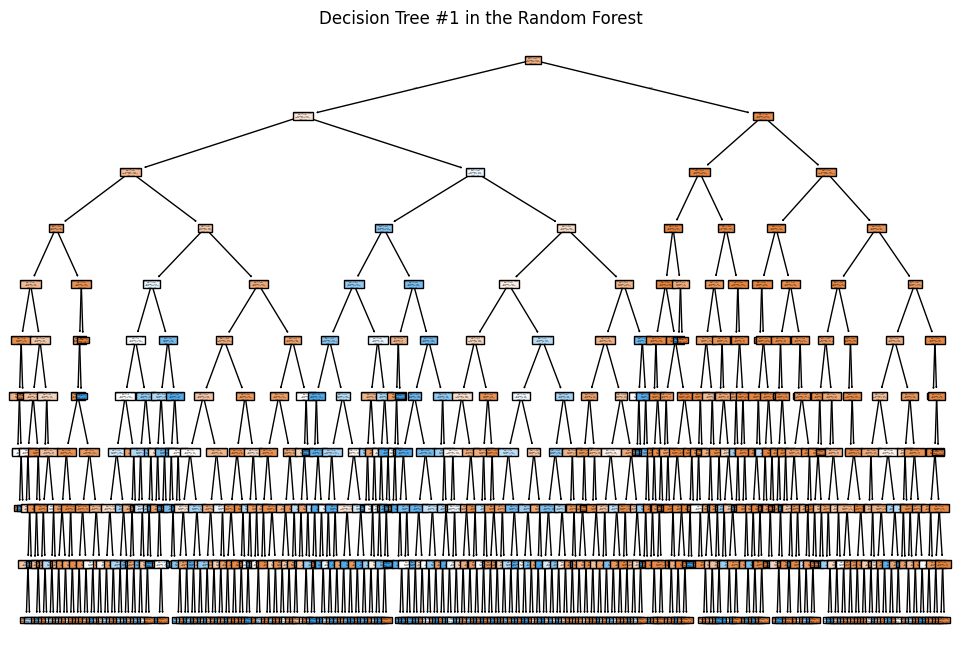

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       0          0
5       1          0
6       0          0
7       0          0
8       1          0
9       1          0


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Telco Customer Churn dataset
def load_data():
    file_path = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Update path if needed
    df = pd.read_csv(file_path)

    # Convert 'TotalCharges' to numeric (handling empty values)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df.fillna(df["TotalCharges"].median(), inplace=True)

    return df

df = load_data()

# Preprocess data
def preprocess_data(df):
    # Drop CustomerID (not useful for prediction)
    df.drop(columns=["customerID"], inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=["object"]).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store for later use

    return df, label_encoders

df, label_encoders = preprocess_data(df)

# Define features and target
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Display Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Show classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the first Decision Tree in the Random Forest
fig, ax = plt.subplots(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=["No", "Yes"], ax=ax)
ax.set_title("Decision Tree #1 in the Random Forest")
plt.show()

# Display Predictions vs Actual Labels
predictions_df = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10]
})

print(predictions_df)


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the data
def load_data():
    file_path = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
    df = pd.read_csv(file_path)
    return df

df = load_data()

# Data Cleaning and Preprocessing
def preprocess_data(df):
    # Convert TotalCharges to numeric, coerce errors to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Handle missing values in TotalCharges (if any)
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

    # Convert binary categorical features to numerical (0 and 1)
    binary_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling', 'MultipleLines']
    for col in binary_cols:
        if col in df.columns:  # Check if the column exists
            df[col] = df[col].map({'Yes': 1, 'No': 0})

    # Convert gender to numerical (0 and 1)
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

    # Convert Churn to numerical (0 and 1)
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Handle remaining categorical features using one-hot encoding
    categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
    df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

    # Drop customerID
    df = df.drop('customerID', axis=1)

    return df

df = preprocess_data(df)

# Prepare data for modeling
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8204400283889283
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



/var/folders/hs/85ptbff91qxf_st7wwgjd7940000gp/T/ipykernel_28460/3040041079.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the data
def load_data():
    file_path = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
    df = pd.read_csv(file_path)
    return df

df = load_data()

# Data Cleaning and Preprocessing
def preprocess_data(df):
    # Convert TotalCharges to numeric, coerce errors to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Handle missing values in TotalCharges (if any)
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

    # Convert binary categorical features to numerical (0 and 1)
    binary_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling', 'MultipleLines']
    for col in binary_cols:
        if col in df.columns:  # Check if the column exists
            df[col] = df[col].map({'Yes': 1, 'No': 0})

    # Convert gender to numerical (0 and 1)
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

    # Convert Churn to numerical (0 and 1)
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Handle remaining categorical features using one-hot encoding
    categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
    df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

    # Drop customerID
    df = df.drop('customerID', axis=1)

    return df

df = preprocess_data(df)

# Prepare data for modeling
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# 1. Tenure and Contract Analysis
# Group by Contract and Tenure, then calculate the churn rate
churn_rate_by_contract_tenure = df.groupby(['Contract', 'tenure'])['Churn'].mean().reset_index()

# Print the results
print("\nChurn Rate by Contract and Tenure:")
print(churn_rate_by_contract_tenure)

# Visualization: Bar plot of churn rate by contract type and tenure (limited to first few tenures for clarity)
plt.figure(figsize=(12, 6))
for contract in df['Contract'].unique():
    subset = churn_rate_by_contract_tenure[churn_rate_by_contract_tenure['Contract'] == contract].head(10)  # Limit to first 10 tenures
    plt.plot(subset['tenure'], subset['Churn'], marker='o', label=contract)

plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Tenure by Contract Type (First 10 Tenures)')
plt.legend()
plt.grid(True)
plt.show()

# 2. MonthlyCharges and InternetService Analysis
# Group by InternetService and MonthlyCharges, then calculate the churn rate
churn_rate_by_internet_monthly = df.groupby(['InternetService', 'MonthlyCharges'])['Churn'].mean().reset_index()

# Print the results
print("\nChurn Rate by Internet Service and Monthly Charges:")
print(churn_rate_by_internet_monthly)

# Visualization: Scatter plot of Monthly Charges vs. Churn Rate by Internet Service
plt.figure(figsize=(12, 6))
for internet_service in df['InternetService'].unique():
    subset = churn_rate_by_internet_monthly[churn_rate_by_internet_monthly['InternetService'] == internet_service]
    plt.scatter(subset['MonthlyCharges'], subset['Churn'], label=internet_service)

plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Monthly Charges by Internet Service')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/hs/85ptbff91qxf_st7wwgjd7940000gp/T/ipykernel_28460/647774057.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Accuracy: 0.8204400283889283
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



KeyError: 'Contract'

Model Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



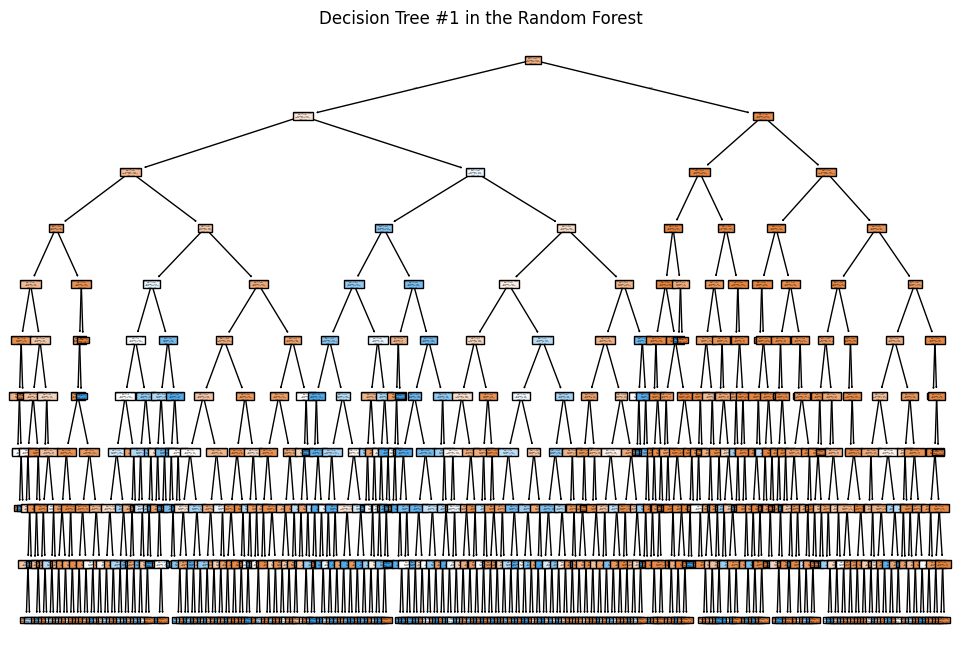

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       0          0
5       1          0
6       0          0
7       0          0
8       1          0
9       1          0


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Telco Customer Churn dataset
def load_data():
    file_path = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Update path if needed
    df = pd.read_csv(file_path)

    # Convert 'TotalCharges' to numeric (handling empty values)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df.fillna(df["TotalCharges"].median(), inplace=True)

    return df

df = load_data()

# Preprocess data
def preprocess_data(df):
    # Drop CustomerID (not useful for prediction)
    df.drop(columns=["customerID"], inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=["object"]).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store for later use

    return df, label_encoders

df, label_encoders = preprocess_data(df)

# Define features and target
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Display Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Show classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the first Decision Tree in the Random Forest
fig, ax = plt.subplots(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=["No", "Yes"], ax=ax)
ax.set_title("Decision Tree #1 in the Random Forest")
plt.show()

# Display Predictions vs Actual Labels
predictions_df = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10]
})

print(predictions_df)


/var/folders/hs/85ptbff91qxf_st7wwgjd7940000gp/T/ipykernel_36465/1045567998.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(selected_data["MonthlyCharges"], selected_data["TotalCharges"], 'o-', linestyle='dotted', markersize=8, markerfacecolor='blue', markeredgecolor='black')


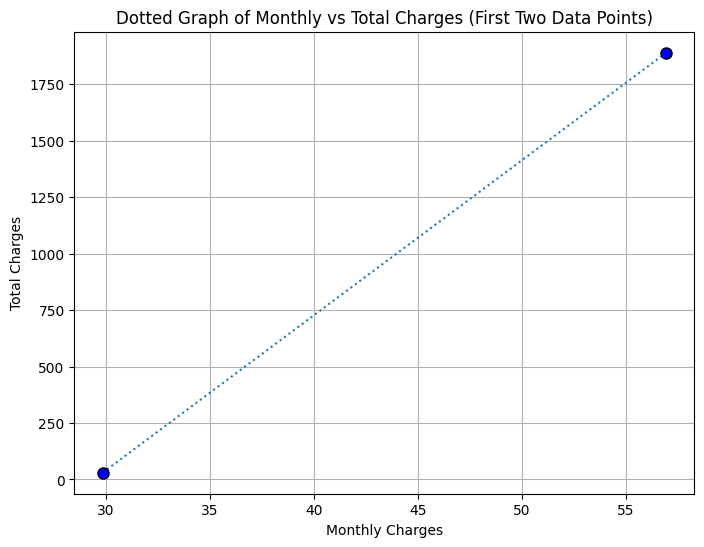

/var/folders/hs/85ptbff91qxf_st7wwgjd7940000gp/T/ipykernel_36465/1045567998.py:47: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(selected_data["MonthlyCharges"], selected_data["TotalCharges"], 'o-', linestyle='dotted', markersize=8, markerfacecolor='blue', markeredgecolor='black')


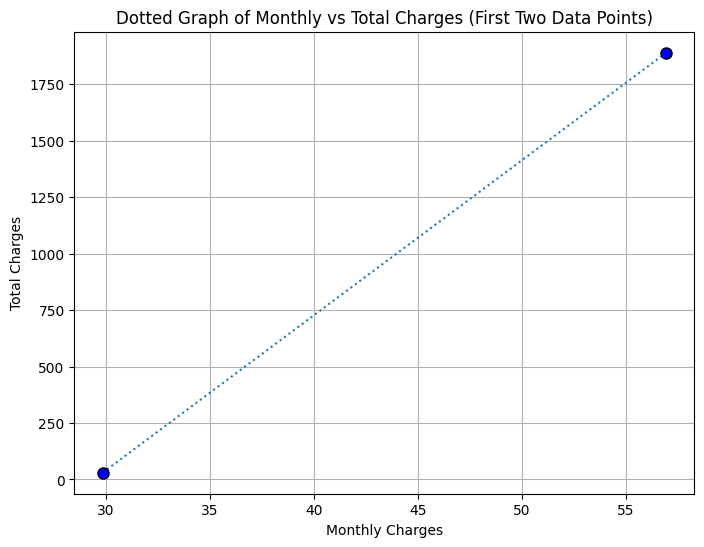

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected relative path (adjust if necessary)
dataset_file = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset into Pandas
df = pd.read_csv(dataset_file)

# Convert 'TotalCharges' to numeric, handling errors
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.fillna(df["TotalCharges"].median(), inplace=True)


# Select two data points (for demonstration)
selected_data = df[["MonthlyCharges", "TotalCharges"]].head(2)

# Create the dotted graph
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(selected_data["MonthlyCharges"], selected_data["TotalCharges"], 'o-', linestyle='dotted', markersize=8, markerfacecolor='blue', markeredgecolor='black')

plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.title("Dotted Graph of Monthly vs Total Charges (First Two Data Points)")
plt.grid(True)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Corrected relative path (adjust if necessary)
dataset_file = "../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset into Pandas
df = pd.read_csv(dataset_file)

# Convert 'TotalCharges' to numeric, handling errors
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.fillna(df["TotalCharges"].median(), inplace=True)


# Select two data points (for demonstration)
selected_data = df[["MonthlyCharges", "TotalCharges"]].head(2)

# Create the dotted graph
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(selected_data["MonthlyCharges"], selected_data["TotalCharges"], 'o-', linestyle='dotted', markersize=8, markerfacecolor='blue', markeredgecolor='black')

plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.title("Dotted Graph of Monthly vs Total Charges (First Two Data Points)")
plt.grid(True)
plt.show()



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error  # Add this line
# Load the dataset
file_path = '../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
# Define features and target
X = df.drop(columns=['Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define numerical and categorical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Create a pipeline for the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(random_state=42))])
# Define hyperparameters for tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5]
}
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# Best model from grid search
best_model = grid_search.best_estimator_
# Make predictions on the test set
y_pred = best_model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")
# Feature Importance
importances = best_model.named_steps['model'].feature_importances_
feature_names = numerical_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()



/var/folders/hs/85ptbff91qxf_st7wwgjd7940000gp/T/ipykernel_36465/3403088634.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


KeyboardInterrupt: 